# Load packages

In [1]:
## standart libraries
import os,sys
import numpy as np

from scipy.signal import argrelmax
from scipy.stats import linregress

# xarray
import xarray as xr

# plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cmocean

# custom tools
import lib_medwest60 as slx

%matplotlib inline 

# Read data

In [2]:
varna="strsym_T"
typ="strain-2D"
naexp="STD1%"
CONFIGCASE='MEDWEST60-GSL14'
ens='ens01'
machine='LAP'
nav_lat_ref,nav_lon_ref,mask,strain,varname,latexvarname=slx.readallmbs(machine=machine,NMBtot=2,typ=typ,varna=varna,CONFIGCASEmed=CONFIGCASE,ens=ens)
strain.attrs['experiment_short_name'] =  naexp


/Users/leroux/DATA/MEDWEST60_DATA/MEDWEST60-GSL14-S/ens01/1h/strain-2D/
001MEDWEST60-GSL14-ens01_1h_*strain-2D_*.nc
/Users/leroux/DATA/MEDWEST60_DATA/MEDWEST60-GSL14-S/ens01/1h/strain-2D/
002MEDWEST60-GSL14-ens01_1h_*strain-2D_*.nc


# plot one member

/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


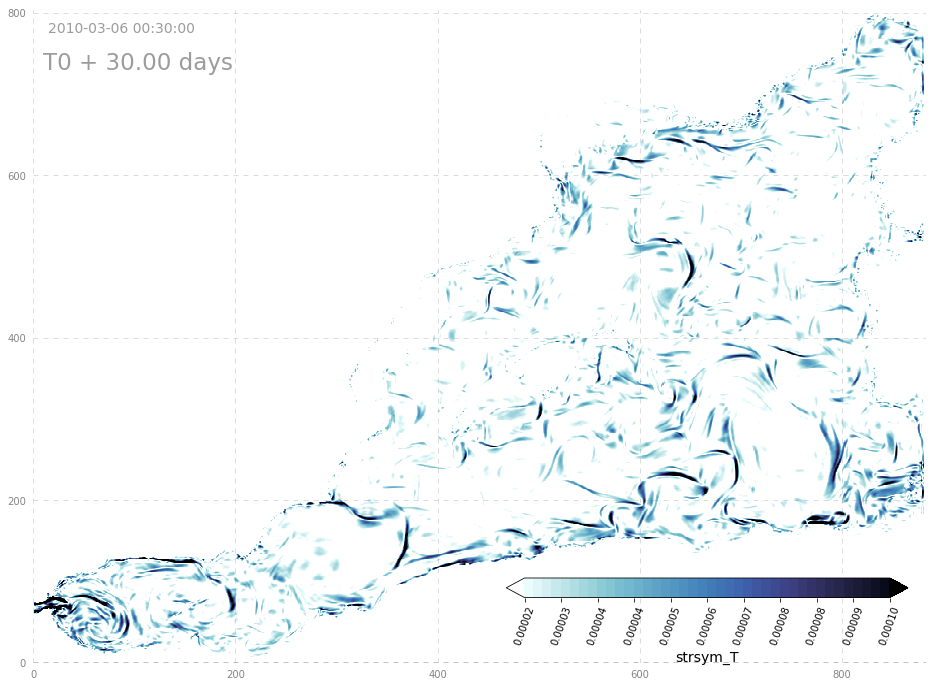

In [94]:
gstyle='lightstyle'
plto = varname+"_"+CONFIGCASE+"-"+ens+"_field"    
diro='/Users/leroux/DATA/RES/MEDWEST60_RES/'

#### for it in range(0,SSH_el.time_counter.size-1):
#for it in range(10,11,6):
for it in range(0,1,6):    
    #====================================
    # data to plot 
    tdate=strain.time_counter.to_index()[it]
    iday = (it+1+719)/24.
    tdelta="T0 + "+str('%.2f'%(iday))+" days"
    tformat="%.3f"
    thr=0.4
    
    data2plot = strain.isel(time_counter=it,e=0).where(mask.isel(z=0)>0).squeeze()  
    data2plot = abs(data2plot)
    #data2plot = data2plot.where(((data2plot>thr)&(data2plot<100))|((data2plot<-1.*thr)&(data2plot>-100)))
    #data2plot = np.sqrt(data2plot*data2plot)
    ##data2plot = data2plot*data2plot
    #data2plot = data2plot.to_masked_array()
    
    
    #data2plot2 = curlens01.isel(time_counter=it,e=1)
    #data2plot2 = data2plot2.where(((data2plot2>thr)&(data2plot2<100))|((data2plot2<-1.*thr)&(data2plot2>-100)))
    #data2plot2 = np.sqrt(data2plot2*data2plot2)
    #data2plot2 = data2plot2.to_masked_array()   
    
    
    namo = plto+'_'+str(it)+'.png'


    #========= Plot settings ===============
    levbounds=[0.00002,0.00010,0.000002]
    
    # customed colormap
    #cmap,norm = slx.mycolormap(levbounds,cm_base='seismic',cu='#8A0808',co='#8A0808')
    #cmap2,norm2 = slx.mycolormap(levbounds,cm_base='seismic_r',cu='#0B243B',co='#0B243B')
    cmap,norm = slx.mycolormap(levbounds,cm_base=cmocean.cm.ice_r,cu='w',co='k')
    cmap2,norm2 = slx.mycolormap(levbounds,cm_base=cmocean.cm.ice_r,cu='#A9E2F3',co='k')
    #cmap,norm = slx.mycolormap(levbounds,cm_base='seismic_r',cu='#0B243B',co='#0B243B')
    
    #cmap,norm = slx.mycolormap(levbounds,cm_base=cmocean.cm.thermal,cu='k',co='y')
    #cmap,norm = mycolormap(levbounds,cm_base='RdYlBu_r',cu='#424242',co='#A4A4A4')
    #cmap,norm = mycolormap(levbounds,cm_base='Spectral_r',cu='#424242',co='#A4A4A4')


    #========= PLOT ===============
    fig3,(ax) = plt.subplots(1, 1, figsize=[16, 12],facecolor='w')

    # main plot
    cs,ax = slx.plotmapMEDWEST_gp(fig3,ax,data2plot,cmap,norm,plto=plto,gridpts=True,gridptsgrid=True,gstyle=gstyle)
    #cs2   = ax.pcolormesh(data2plot2,cmap=cmap2,norm=norm2)
    lalpha=0.2
    lwidthgrid=1.
    gridinc=200
    lstylegrid=(0, (5, 5))
    if (gstyle=='lightstyle'):
            cmap.set_bad('w')
            lcolorgrid="#585858" # "#D8D8D8"
            tcolorgrid='#848484'#"#848484"            

    #ax = plt.gca()
    ax.xaxis.set_major_locator(mticker.MultipleLocator(gridinc))
    ax.yaxis.set_major_locator(mticker.MultipleLocator(gridinc))   
    ax.tick_params(axis='x', colors=tcolorgrid)
    ax.tick_params(axis='y', colors=tcolorgrid)
    ax.grid(which='major',linestyle=lstylegrid,color=lcolorgrid,alpha=lalpha,linewidth=lwidthgrid)
    ax.axhline(y=1.,xmin=0, xmax=883,zorder=10,color=lcolorgrid,linewidth=lwidthgrid,linestyle=lstylegrid,alpha=lalpha )
    
    # add date
    tcolordate="848484"
    tsizedate=14
    
    ax.annotate(tdate,xy=(15,775),xycoords='data', color=tcolordate,size=tsizedate)
    plt.axhline(y=350.,xmin=200, xmax=400,zorder=10,color='r',linewidth=3,linestyle='-',alpha=1 )
    #plt.annotate(tdelta,xy=(15,750),xycoords='data', color=tcolordate,size=tsizedate)
    plt.annotate(tdelta,xy=(10,730),xycoords='data', color=tcolordate,size=23)
       
    
    # add colorbar
    cbon=True
    if cbon:
        tlabel=latexvarname+slx.textunit(varname)
        cb = slx.addcolorbar(fig3,cs,ax,levbounds,levincr=4,tformat="%.5f",tlabel=tlabel,facmul=1,orientation='horizontal',tc='k')
        
    
    #plt.figimage(ON_res , 700, 630, zorder=10,alpha=1) 
    
    # display only once
    #if it==10:
    #    plt.show()
    plt.show()
         
    # Save fig in png, resolution dpi    
    slx.saveplt(fig3,diro,namo,dpifig=300)
    

# plot 2 members

In [96]:
gstyle='lightstyle'
plto = varname+"_"+CONFIGCASE+"-"+ens+"_field"    
diro='/Users/leroux/DATA/RES/MEDWEST60_RES/'

#### for it in range(0,SSH_el.time_counter.size-1):
#for it in range(10,11,6):
for it in range(0,1,6):    
    #====================================
    # data to plot 
    tdate=strain.time_counter.to_index()[it]
    iday = (it+1+719)/24.
    tdelta="T0 + "+str('%.2f'%(iday))+" days"
    tformat="%.3f"
    thr=0.4
    
    data2plot = strain.isel(time_counter=it,e=1).where(mask.isel(z=0)>0).squeeze()  
    data2plot = abs(data2plot)
    data2plot = data2plot.where(data2plot>0.00002)
    data2plot = data2plot.to_masked_array()
    
    data2plot2 = strain.isel(time_counter=it,e=0).where(mask.isel(z=0)>0).squeeze()  
    data2plot2 = abs(data2plot2)
    data2plot2 = data2plot2.where(data2plot2>0.00002)
    data2plot2 = data2plot2.to_masked_array()
    
    
    
    namo = plto+'_'+str(it)+'.png'


    #========= Plot settings ===============
    levbounds=[0.00002,0.00010,0.000002]
      
    cmap,norm = slx.mycolormap(levbounds,cm_base='autumn_r',cu='w',co='#4A0292',istart=0)
    cmap2,norm2 = slx.mycolormap(levbounds,cm_base=cmocean.cm.ice_r,cu='w',co='k')

    #========= PLOT ===============
    fig3,(ax) = plt.subplots(1, 1, figsize=[16, 12],facecolor='w')

    # main plot
    cs,ax = slx.plotmapMEDWEST_gp(fig3,ax,data2plot,cmap,norm,plto=plto,gridpts=True,gridptsgrid=True,gstyle=gstyle)
    cs2   = ax.pcolormesh(data2plot2,cmap=cmap2,norm=norm2)
    lalpha=0.2
    lwidthgrid=1.
    gridinc=200
    lstylegrid=(0, (5, 5))
    if (gstyle=='lightstyle'):
            cmap.set_bad('w')
            lcolorgrid="#585858" # "#D8D8D8"
            tcolorgrid='#848484'#"#848484"            

    #ax = plt.gca()
    ax.xaxis.set_major_locator(mticker.MultipleLocator(gridinc))
    ax.yaxis.set_major_locator(mticker.MultipleLocator(gridinc))   
    ax.tick_params(axis='x', colors=tcolorgrid)
    ax.tick_params(axis='y', colors=tcolorgrid)
    ax.grid(which='major',linestyle=lstylegrid,color=lcolorgrid,alpha=lalpha,linewidth=lwidthgrid)
    ax.axhline(y=1.,xmin=0, xmax=883,zorder=10,color=lcolorgrid,linewidth=lwidthgrid,linestyle=lstylegrid,alpha=lalpha )
    
    # add date
    tcolordate="848484"
    tsizedate=14
    
    ax.annotate(tdate,xy=(15,775),xycoords='data', color=tcolordate,size=tsizedate)
    plt.axhline(y=350.,xmin=200, xmax=400,zorder=10,color='r',linewidth=3,linestyle='-',alpha=1 )
    #plt.annotate(tdelta,xy=(15,750),xycoords='data', color=tcolordate,size=tsizedate)
    plt.annotate(tdelta,xy=(10,730),xycoords='data', color=tcolordate,size=23)
       
    
    # add colorbar
    cbon=True
    if cbon:
        tlabel=latexvarname+slx.textunit(varname)
        cb = slx.addcolorbar(fig3,cs,ax,levbounds,levincr=4,tformat="%.5f",tlabel=tlabel,facmul=1,orientation='horizontal',tc='k')
        
    
    #plt.figimage(ON_res , 700, 630, zorder=10,alpha=1) 
    
    # display only once
    #if it==10:
    #    plt.show()
    plt.show()
         
    # Save fig in png, resolution dpi    
    slx.saveplt(fig3,diro,namo,dpifig=300)
    

/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater
  return func(*args2)


TypeError: mycolormap() got an unexpected keyword argument 'istart'